In [2]:
# Libraries Imports
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting a function to clean text data
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s,!?]+", "", text)
    return text.lower().strip()

In [4]:
# Setting the dataset path
dataset_path = "/Users/diegolemos/Masters/ML/CA2/twcs.csv"

In [5]:
# Loading the dataset
try:
    df = pd.read_csv(dataset_path)
except Exception as e:
    print("Error loading the dataset")

In [6]:
# Dataset informations
print("Dataset shape: ", df.shape)
print("Dataset Columns: ", df.columns)

Dataset shape:  (2811774, 7)
Dataset Columns:  Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')


In [7]:
# Printing the head of the dataset
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [8]:
# Checking for missing values
df.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [9]:
# Creating a conversation_id so if in_response_tweet_id is missing it uses tweet_id
df['conversation_id'] = df.apply(
    lambda row: row['tweet_id'] if pd.isnull(row['in_response_to_tweet_id']) or row['in_response_to_tweet_id'] == ""
    else row['in_response_to_tweet_id'], axis = 1
)

In [10]:
# Rechecking missing values
print(df[['in_response_to_tweet_id', 'conversation_id']].isnull().sum())

in_response_to_tweet_id    794335
conversation_id                 0
dtype: int64


#### Insight
As the objective of this project is detect customer dissatisfaction in early stages within a conversation, we decided to treat the missing values creating a new column called 'conversation_id', preserving the concersation context. The new column uses the tweet's own Id if the parent ID is missing, this way every tweet has a conversation identier, and we can later group messages to analyse the conversation evolution.

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

In [12]:
# Checking for unique value
df.nunique()

tweet_id                   2811774
author_id                   702777
inbound                          2
created_at                 2061666
text                       2782618
response_tweet_id          1771145
in_response_to_tweet_id    1774822
conversation_id            1774822
dtype: int64

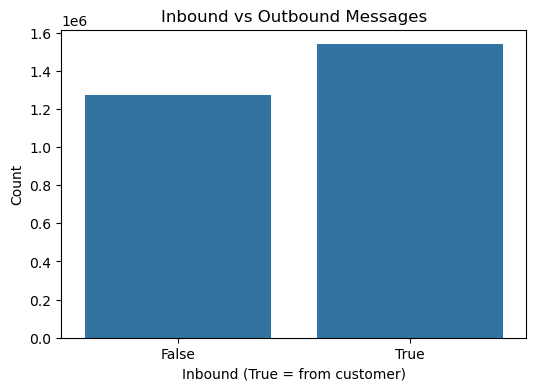

In [13]:
# Checking distribution of messages
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'inbound')
plt.title('Inbound vs Outbound Messages')
plt.xlabel('Inbound (True = from customer)')
plt.ylabel('Count')
plt.show()

#### Insight
As we can see on the plot above, this dataset is customer-dominat, what is crucial for the object of the project.

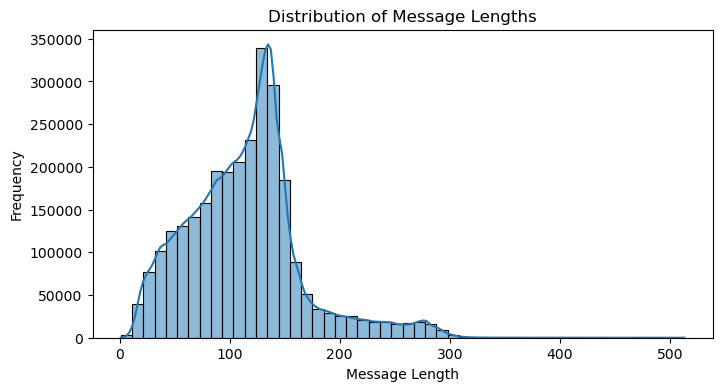

In [14]:
# Checking message length distribution
df['message_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize = (8, 4))
sns.histplot(df['message_length'], bins = 50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

#### Insight
Even thought throught the plot above we can see the huge variation of text lenght, we going to proceed with the essages as it is, as for the objective of this project, the conversation as whole its what metter the most.

In [15]:
# Cleaning text
if 'text' in df.columns:
    df['clean_text'] = df['text'].astype(str).apply(clean_text)
    print("Cleaned text column created ")
else:
    print("There are no column 'text'")

Cleaned text column created 


In [16]:
# Removings NaNs rom clean text column
df = df[df['clean_text'].notnull()]
df['clean_text'] = df['clean_text'].astype(str)

In [18]:
# Checking clean_text column
print(df['clean_text'].isnull().sum())
print(df['clean_text'].apply(type).value_counts())

0
clean_text
<class 'str'>    2811774
Name: count, dtype: int64


In [59]:
# Printing cleaned dataset head
pd.set_option('display.max_colwidth', None)
df[['text', 'clean_text']].head()

,text,clean_text
0,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,i understand i would like to assist you we would need to get you into a private secured link to further assist
1,@sprintcare and how do you propose we do that,and how do you propose we do that
2,@sprintcare I have sent several private messages and no one is responding as usual,i have sent several private messages and no one is responding as usual
3,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,please send us a private message so that we can further assist you just click message at the top of your profile
4,@sprintcare I did.,i did


In [60]:
# Saving the new dataset
cleaned_dataset_path = "cleaned_twcs_csv"
df.to_csv(cleaned_dataset_path, index = False)
print('Cleaned dataset saved as {cleamed_dataset_path}')

Cleaned dataset saved as {cleamed_dataset_path}
